In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

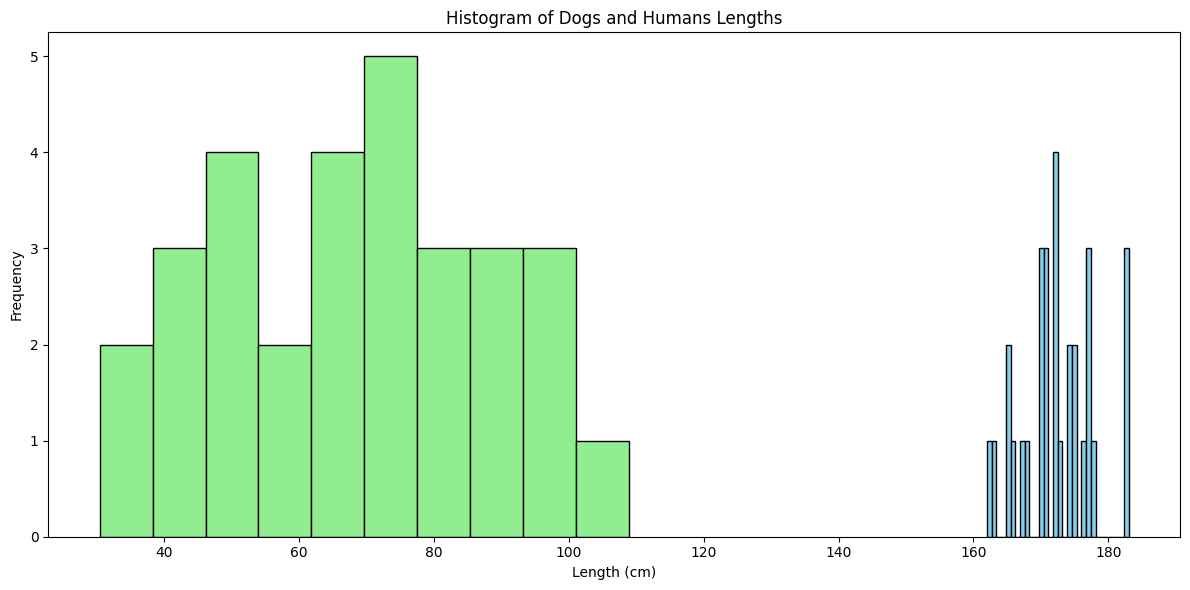

In [56]:
np.random.seed(42)

mu_height = (155 + 192) / 2  
sigma_height = (192 - 155) / 6  
s1 = pd.Series(np.random.normal(mu_height, sigma_height, 30).clip(155, 192))

mu_length = (30 + 110) / 2  
sigma_length = (110 - 30) / 6  
s2_normal_part = np.random.normal(mu_length, sigma_length, 20).clip(30, 110)
s2_skewed_part = np.random.uniform(30, 110, 10)  
s2 = pd.Series(np.concatenate((s2_normal_part, s2_skewed_part)))

s2 = s2.sample(frac=1).reset_index(drop=True)

plt.figure(figsize=(12, 6))

plt.hist(s1.round(0), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Human Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

plt.hist(s2, bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Dogs and Humans Lengths')
plt.xlabel('Length (cm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [54]:
round(sum(summ))

0

## Stats

In [59]:
s1 = s1.round(0)
s1

0     177.0
1     173.0
2     177.0
3     183.0
4     172.0
5     172.0
6     183.0
7     178.0
8     171.0
9     177.0
10    171.0
11    171.0
12    175.0
13    162.0
14    163.0
15    170.0
16    167.0
17    175.0
18    168.0
19    165.0
20    183.0
21    172.0
22    174.0
23    165.0
24    170.0
25    174.0
26    166.0
27    176.0
28    170.0
29    172.0
dtype: float64

In [60]:
s1.mean()

172.4

In [61]:
s1.mode()

0    172.0
dtype: float64

In [62]:
s1.median()

172.0

In [63]:
s1.var()

30.455172413793097

In [64]:
s1.std()

5.518620517284469

In [65]:
s1.describe()

count     30.000000
mean     172.400000
std        5.518621
min      162.000000
25%      170.000000
50%      172.000000
75%      175.750000
max      183.000000
dtype: float64

Text(0, 0.5, 'Frequency')

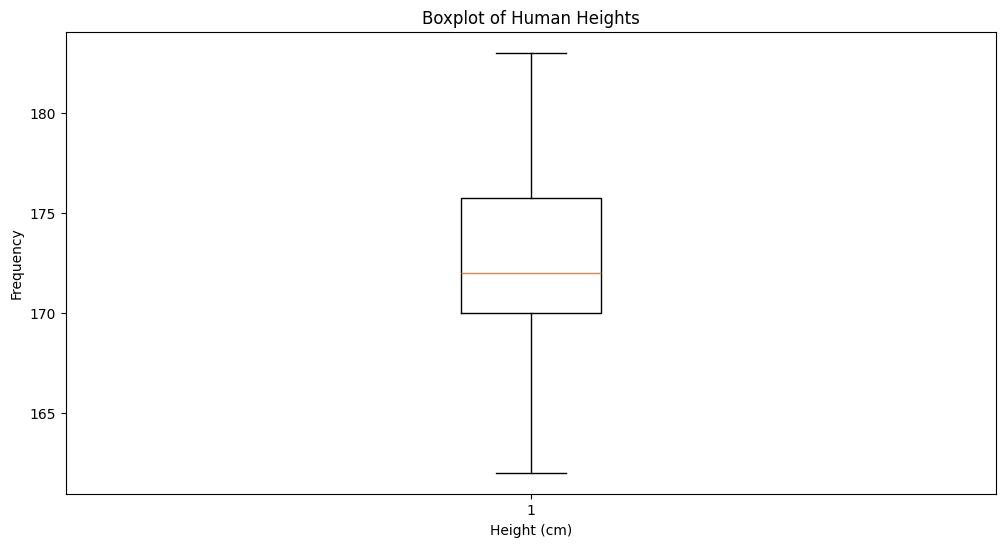

In [66]:
plt.figure(figsize=(12, 6))

plt.boxplot(s1)
plt.title('Boxplot of Human Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

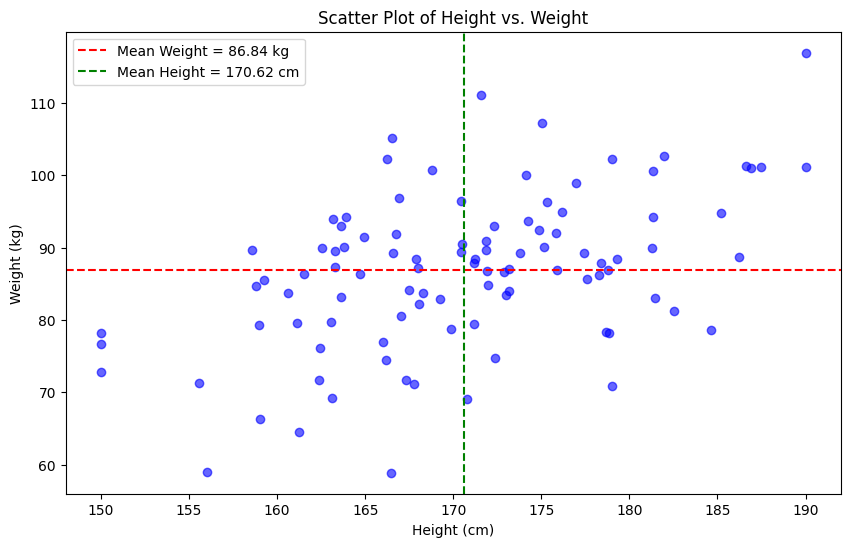

In [67]:
np.random.seed(1)

height = np.random.normal(170, 10, 100).clip(150, 190)  
weight = height * 0.5 + np.random.normal(0, 10, 100)  

df = pd.DataFrame({'Height': height, 'Weight': weight})

mean_height = df['Height'].mean()
mean_weight = df['Weight'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(df['Height'], df['Weight'], color='blue', alpha=0.6)

plt.axhline(mean_weight, color='red', linestyle='--', label=f'Mean Weight = {mean_weight:.2f} kg')
plt.axvline(mean_height, color='green', linestyle='--', label=f'Mean Height = {mean_height:.2f} cm')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter Plot of Height vs. Weight')
plt.legend()

plt.show()


In [69]:
df

Height     Weight
0   186.243454  88.650441
1   163.882436  94.186295
2   164.718282  86.394058
3   159.270314  85.570942
4   178.654076  78.377920
..         ...        ...
95  170.773401  69.112317
96  166.561463  89.303924
97  170.435969  89.420806
98  163.799992  90.009513
99  176.980320  98.934581

[100 rows x 2 columns]

In [70]:
np.cov(df['Height'], df['Weight'])

array([[ 76.2826328 ,  45.27082947],
       [ 45.27082947, 113.93899347]])

In [72]:
np.corrcoef(df['Height'], df['Weight'])

array([[1.        , 0.48558965],
       [0.48558965, 1.        ]])

In [71]:
df.cov()

Height      Weight
Height  76.282633   45.270829
Weight  45.270829  113.938993

In [73]:
df.corr()

Height   Weight
Height  1.00000  0.48559
Weight  0.48559  1.00000

In [74]:
df['Height'].corr(df['Weight'])

0.4855896547198276

In [ ]:
df.head()

## Pandas

In [76]:
df = pd.read_csv('train.csv')

In [77]:
#df = pd.read_excel('abc.xlsx')

In [84]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [83]:
df.shape

(891, 12)

In [85]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [86]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df2 = df.copy()

In [87]:
df3 = df.fillna(method='ffill')
df3

C:\Users\Roman\AppData\Local\Temp\ipykernel_12960\627673650.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3 = df.fillna(method='ffill')


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  19.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   C85        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500  C123        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   C50        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   B42        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500  C148        Q  

[891 rows x 12 columns]

In [ ]:
df3 = df.fillna({'Age' : df['Age'].mean()})
df3.isna().sum()

In [89]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [93]:
columns = ['PassengerId', 'Survived', 'Pclass', 'Name']

In [95]:
df[columns]

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Fare  
0                              Braund, Mr. Owen Harris   7.2500  
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  71.2833  
2                               Heikkinen, Miss. Laina   7.9250  
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  53.1000  
4                             Allen, Mr. William Henry   8.0500  
..                                                 ...      ...  
886                              Montvila, Rev. Juozas  13.0000  
887                       Graham, Miss. Margaret Edith  30.0000  
888           Johnston, Miss. Catherine Helen "Carrie"  23.4500  
889                              Behr, Mr. Karl Howell  30.0000  
890                                Dooley, Mr. Patrick   7.7500  

[891 rows x 5 columns]

In [92]:
df[['Age', 'Sex', 'PassengerId']]

Age     Sex  PassengerId
0    22.0    male            1
1    38.0  female            2
2    26.0  female            3
3    35.0  female            4
4    35.0    male            5
..    ...     ...          ...
886  27.0    male          887
887  19.0  female          888
888   NaN  female          889
889  26.0    male          890
890  32.0    male          891

[891 rows x 3 columns]

In [96]:
df3['Age'].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    19
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [98]:
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [97]:
df = df.drop(['Cabin', 'Embarked'], axis=1)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare  
0        0         A/5 21171   7.2500  
1        0          PC 17599  71.2833  
2        0  STON/O2. 3101282   7.9250  
3        0            113803  53.1000  
4        0            373450   8.0500  
..     ...               ...      ...  
886      0            211536  13.0000  
887      0            112053  30.0000  
888      2        W./C. 6607  23.4500  
889      0            111369  30.0000  
890      0            370376   7.7500  

[891 rows x 10 columns]

In [99]:
df.rename(columns={'SibSp' : 'realtives',
                   'Fare' : '123'}, inplace=True)

In [100]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  realtives  \
0                            Braund, Mr. Owen Harris    male  22.0          1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0          1   
2                             Heikkinen, Miss. Laina  female  26.0          0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0          1   
4                           Allen, Mr. William Henry    male  35.0          0   

   Parch            Ticket      123 Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [103]:
df[df['Age'] > 50]

PassengerId  Survived  Pclass  \
6              7         0       1   
11            12         1       1   
15            16         1       2   
33            34         0       2   
54            55         0       1   
..           ...       ...     ...   
820          821         1       1   
829          830         1       1   
851          852         0       3   
857          858         1       1   
879          880         1       1   

                                                  Name     Sex   Age  \
6                              McCarthy, Mr. Timothy J    male  54.0   
11                            Bonnell, Miss. Elizabeth  female  58.0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0   
33                               Wheadon, Mr. Edward H    male  66.0   
54                      Ostby, Mr. Engelhart Cornelius    male  65.0   
..                                                 ...     ...   ...   
820  Hays, Mrs. Charles Melville (Clara Jennings Gr...  female  52.0   
829          Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0   
851                                Svensson, Mr. Johan    male  74.0   
857                             Daly, Mr. Peter Denis     male  51.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0   

     realtives  Parch      Ticket      123 Cabin Embarked  
6            0      0       17463  51.8625   E46        S  
11           0      0      113783  26.5500  C103        S  
15           0      0      248706  16.0000   NaN        S  
33           0      0  C.A. 24579  10.5000   NaN        S  
54           0      1      113509  61.9792   B30        C  
..         ...    ...         ...      ...   ...      ...  
820          1      1       12749  93.5000   B69        S  
829          0      0      113572  80.0000   B28      NaN  
851          0      0      347060   7.7750   NaN        S  
857          0      0      113055  26.5500   E17        S  
879          0      1       11767  83.1583   C50        C  

[64 rows x 12 columns]

In [105]:
df[~(df['Pclass'] == 1) & (df['Sex'] == 'female')]

PassengerId  Survived  Pclass  \
2              3         1       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
14            15         0       3   
..           ...       ...     ...   
875          876         1       3   
880          881         1       2   
882          883         0       3   
885          886         0       3   
888          889         0       3   

                                                  Name     Sex   Age  \
2                               Heikkinen, Miss. Laina  female  26.0   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0   
..                                                 ...     ...   ...   
875                   Najib, Miss. Adele Kiamie "Jane"  female  15.0   
880       Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0   
882                       Dahlberg, Miss. Gerda Ulrika  female  22.0   
885               Rice, Mrs. William (Margaret Norton)  female  39.0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN   

     realtives  Parch            Ticket      123 Cabin Embarked  
2            0      0  STON/O2. 3101282   7.9250   NaN        S  
8            0      2            347742  11.1333   NaN        S  
9            1      0            237736  30.0708   NaN        C  
10           1      1           PP 9549  16.7000    G6        S  
14           0      0            350406   7.8542   NaN        S  
..         ...    ...               ...      ...   ...      ...  
875          0      0              2667   7.2250   NaN        C  
880          0      1            230433  26.0000   NaN        S  
882          0      0              7552  10.5167   NaN        S  
885          0      5            382652  29.1250   NaN        Q  
888          1      2        W./C. 6607  23.4500   NaN        S  

[220 rows x 12 columns]

In [107]:
df3[['Age', 'Sex']]

Age     Sex
0    22.0    male
1    38.0  female
2    26.0  female
3    35.0  female
4    35.0    male
..    ...     ...
886  27.0    male
887  19.0  female
888  19.0  female
889  26.0    male
890  32.0    male

[891 rows x 2 columns]

In [106]:
df3[['Age', 'Sex']].groupby('Sex').mean()

Age
Sex              
female  28.429682
male    30.208406

In [111]:
df3[['Pclass', 'Age', 'Sex']].groupby(['Sex', 'Pclass']).mean().reset_index()

Sex  Pclass        Age
0  female       1  33.786383
1  female       2  28.690789
2  female       3  24.795139
3    male       1  39.245246
4    male       2  30.253056
5    male       3  27.017291

In [113]:
df3[['Pclass', 'Age', 'Sex']].groupby(['Sex', 'Pclass']).agg(['mean', 'max', 'min']).reset_index()

Sex Pclass        Age            
                       mean   max   min
0  female      1  33.786383  65.0  0.92
1  female      2  28.690789  57.0  2.00
2  female      3  24.795139  63.0  0.75
3    male      1  39.245246  80.0  0.92
4    male      2  30.253056  70.0  0.67
5    male      3  27.017291  74.0  0.42

In [ ]:
df3[['Pclass', 'Age', 'Sex', 'Parch']].groupby(['Sex', 'Pclass']).agg(['mean', 'max', 'min'])

In [114]:
df3[['Pclass', 'Age', 'Sex', 'Parch']].groupby(['Sex', 'Pclass']).agg({'Age': 'mean', 'Parch': ['min', 'count']})

Age Parch      
                    mean   min count
Sex    Pclass                       
female 1       33.786383     0    94
       2       28.690789     0    76
       3       24.795139     0   144
male   1       39.245246     0   122
       2       30.253056     0   108
       3       27.017291     0   347

In [123]:
data = {
    "name": {"1": "Michael", "2": "John", "3": "Liza"},
    "country": {"1": "Canada", "2": "USA", "3": "Australia"},
    "age": {"1": 25, "2": 32, "3": 19}
}

employees = pd.DataFrame(data)

new_employee = pd.Series(["Jhon", "Denmark", 23], ["name", "country", "age"])

employees.loc["4"] = new_employee.values
print(employees)

employees2 = pd.concat([employees, pd.DataFrame(new_employee).T], ignore_index=True)
print(employees2)

      name    country  age
1  Michael     Canada   25
2     John        USA   32
3     Liza  Australia   19
4     Jhon    Denmark   23
      name    country age
0  Michael     Canada  25
1     John        USA  32
2     Liza  Australia  19
3     Jhon    Denmark  23
4     Jhon    Denmark  23


In [121]:
pd.DataFrame(new_employee).transpose()

name  country age
0  Jhon  Denmark  23

In [124]:
Sex = ['male', 'male', 'male', 'female', 'female', 'female']
Pclass = [1, 2, 3, 1, 2, 3]
Position = ['Senior', 'Middle', 'Junior', 'Senioritta', 'Middletta', 'Juniorka']

df2 = pd.DataFrame({'Sex' : Sex,
                    'Pclass' : Pclass,
                    'Position' : Position})

df2

Sex  Pclass    Position
0    male       1      Senior
1    male       2      Middle
2    male       3      Junior
3  female       1  Senioritta
4  female       2   Middletta
5  female       3    Juniorka

In [125]:
df3

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  19.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   C85        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500  C123        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   C50        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   B42        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500  C148        Q  

[891 rows x 12 columns]

In [126]:
df3.merge(df2, how='left', on=['Sex', 'Pclass'])

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  19.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked    Position  
0        0         A/5 21171   7.2500   NaN        S      Junior  
1        0          PC 17599  71.2833   C85        C  Senioritta  
2        0  STON/O2. 3101282   7.9250   C85        S    Juniorka  
3        0            113803  53.1000  C123        S  Senioritta  
4        0            373450   8.0500  C123        S      Junior  
..     ...               ...      ...   ...      ...         ...  
886      0            211536  13.0000   C50        S      Middle  
887      0            112053  30.0000   B42        S  Senioritta  
888      2        W./C. 6607  23.4500   B42        S    Juniorka  
889      0            111369  30.0000  C148        C      Senior  
890      0            370376   7.7500  C148        Q      Junior  

[891 rows x 13 columns]

In [127]:
df[columns]

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  
0                              Braund, Mr. Owen Harris  
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  
2                               Heikkinen, Miss. Laina  
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  
4                             Allen, Mr. William Henry  
..                                                 ...  
886                              Montvila, Rev. Juozas  
887                       Graham, Miss. Margaret Edith  
888           Johnston, Miss. Catherine Helen "Carrie"  
889                              Behr, Mr. Karl Howell  
890                                Dooley, Mr. Patrick  

[891 rows x 4 columns]

In [128]:
df.loc[800:, ['Name', 'Survived']]

Name  Survived
800                         Ponesell, Mr. Martin         0
801  Collyer, Mrs. Harvey (Charlotte Annie Tate)         1
802          Carter, Master. William Thornton II         1
803              Thomas, Master. Assad Alexander         1
804                      Hedman, Mr. Oskar Arvid         1
..                                           ...       ...
886                        Montvila, Rev. Juozas         0
887                 Graham, Miss. Margaret Edith         1
888     Johnston, Miss. Catherine Helen "Carrie"         0
889                        Behr, Mr. Karl Howell         1
890                          Dooley, Mr. Patrick         0

[91 rows x 2 columns]

In [129]:
df.iloc[:, 3:5]

Name     Sex
0                              Braund, Mr. Owen Harris    male
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female
2                               Heikkinen, Miss. Laina  female
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female
4                             Allen, Mr. William Henry    male
..                                                 ...     ...
886                              Montvila, Rev. Juozas    male
887                       Graham, Miss. Margaret Edith  female
888           Johnston, Miss. Catherine Helen "Carrie"  female
889                              Behr, Mr. Karl Howell    male
890                                Dooley, Mr. Patrick    male

[891 rows x 2 columns]

In [ ]:
df.to_excel('final_df.xlsx', index=False)